### Topic: Analyzing Nigerian Traffic crashes (Q4 2020 - Q1 2024)

-	Which Nigerian states experienced the highest number of traffic crashes, and how do these numbers change over time.
-   What are the major contributing factors (speeding, alcohol/drug influence, poor weather, fatigue) to road crashes, and how do they impact the severity of accidents (injuries and fatalities).
  
-   	How do the total number of vehicles involved in crashes correlate with the number of injuries and fatalities.

In [1]:
# importing the necessary libraries for analysis
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#reading the dataset into pandas
data = pd.read_csv('Datasets/Nigerian_Road_Traffic_Crashes_Dataset.csv')

# Data Exploration, Wrangling and Cleaning 

In [3]:
#Reading the head of the data set
data.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


In [4]:
# displaying the shape of the data
data.shape

(518, 11)

In [5]:
# displaying the center location of the data
data.iloc[150:200]

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
150,Q4 2021,Akwa Ibom,22,39,10,23,0,0,0,12,11
151,Q4 2021,Anambra,59,156,45,64,1,0,1,24,38
152,Q4 2021,Bauchi,217,882,156,247,0,0,1,124,122
153,Q4 2021,Bayelsa,12,37,24,19,0,0,0,16,3
154,Q4 2021,Benue,53,123,9,51,1,0,0,34,16
155,Q4 2021,Borno,21,70,5,21,0,0,0,13,8
156,Q4 2021,Cross River,54,133,20,70,0,0,0,48,22
157,Q4 2021,Delta,58,172,30,71,0,0,0,29,42
158,Q4 2021,Ebonyi,30,87,29,33,0,0,0,16,17
159,Q4 2021,Edo,63,125,40,87,0,0,0,61,26


In [6]:
# displaying the summary information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Quarter                  518 non-null    object
 1   State                    518 non-null    object
 2   Total_Crashes            518 non-null    int64 
 3   Num_Injured              518 non-null    int64 
 4   Num_Killed               518 non-null    int64 
 5   Total_Vehicles_Involved  518 non-null    int64 
 6   SPV                      518 non-null    int64 
 7   DAD                      518 non-null    int64 
 8   PWR                      518 non-null    int64 
 9   FTQ                      518 non-null    int64 
 10  Other_Factors            518 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 44.6+ KB


In [7]:
# checking for null values (missing values)
data.isnull().sum()

Quarter                    0
State                      0
Total_Crashes              0
Num_Injured                0
Num_Killed                 0
Total_Vehicles_Involved    0
SPV                        0
DAD                        0
PWR                        0
FTQ                        0
Other_Factors              0
dtype: int64

In [8]:
# displaying the columns contained in the dataset
data.columns 

Index(['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed',
       'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'],
      dtype='object')

In [9]:
# checking for duplicated values on the entire data
data.duplicated().sum()

0

In [10]:
#checking for duplicated values on quarter column 
data['Quarter'].duplicated().sum()

504

In [11]:
#checking for unique values in quarter column
data['Quarter'].unique()

array(['Q4 2020', 'Q1 2021', 'Q2 2021', 'Q3 2021', 'Q4 2021', 'Q1 2022',
       'Q2 2022', 'Q3 2022', 'Q4 2022', 'Q1 2023', 'Q2 2023', 'Q3 2023',
       'Q4 2023', 'Q1 2024'], dtype=object)

In [12]:
#checking the number of unique values in quarter column
data['Quarter'].nunique()

14

In [13]:
#checking for unique values in state column 
data['State'].unique()

array(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa',
       'Benue', 'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti',
       'Enugu', 'FCT', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano',
       'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger',
       'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto',
       'Taraba', 'Yobe', 'Zamfara'], dtype=object)

In [14]:
#Checking the number of unique values in the state column
data['State'].nunique()

37

In [15]:
#Cheecking the sum of duplicated figures in the state column
data['State'].duplicated().sum()

481

In [16]:
#Checking for unique values in the total_crashes column
data['Total_Crashes'].unique()

array([ 30,  77,  22,  72, 154,   1,  25,  33,  67,  27,  55,  44, 312,
        70,  31,  92, 281, 102,  58, 122, 113, 200, 110, 279, 114, 109,
       155,  45,  32,  59,  56,  84,  80, 131,   7,  52,  71,  66, 278,
        16, 256, 137, 143, 100, 151, 176, 108, 299, 115, 105,  48,  21,
        37,  42,  41,  90,  10,  69,  17,  29, 252,  93,  23,  63, 222,
        39,  53,  97, 145, 242, 148, 337,  87, 152,  99,  26,  46,  20,
        13,  62, 130,  19,  34, 307,  73,  94, 174,  18,  54,  95,  78,
       141, 212, 219,  96,  76, 217,  12, 280, 129, 177,  40, 159, 263,
       180, 286, 134, 107, 163,  74,  35,  79,  38, 140,  81,  57, 319,
       197, 142, 198, 247, 146, 268, 127, 173,  64,  28,  15, 538,  88,
       181,  91, 139, 237, 128, 239, 171,  24,  60, 464, 147, 192, 104,
       241, 124, 306, 166,   8, 482, 179, 205, 120,  36, 138, 167, 234,
       301, 101, 165,  68,   9,   6,  49, 382,  61, 203, 123, 269, 106,
       320, 190, 208, 150, 283,  89, 144,  47,  50,  51,   5, 34

In [17]:
#Checking for the number of unique values in the Total_Crashes column
data['Total_Crashes'].nunique()

194

In [18]:
#Checking  the sum of duplicated values in the Total_Crashes column
data['Total_Crashes'].duplicated().sum()

324

In [19]:
#Checking for unique values on the Num_injured column
data['Num_Injured'].unique()

array([ 146,  234,   28,  152,  685,    3,  177,   67,   65,  182,   82,
        118,   71,  116,  572,  231,   91,  318, 1010,  499,  277,  222,
        335,  313,  181,  513,  347,  548,  320,  292,  385,  123,   77,
        138,  149,  383,  252,  119,  251,   35,  147,  634,   15,   78,
         50,  196,  121,  140,  101,  518,  232,  264, 1149,  604,  287,
        139,  425,  369,  243,  452,  492,  670,  290,  317,  399,  130,
         54,  213,  235,  153,   69,  280,   32,  418,   19,  170,   74,
        136,  154,   98,  157,  483,  239,   64,  370,  837,  286,  148,
        246,  368,  266,  600,  516,  637,  299,  250,  400,  283,   87,
        171,  168,   62,  208,   18,  142,  627,   23,  159,  110,  144,
        122,  100,  158,  127,  270,  562,  218,   85,  312,  684,  131,
        255,  233,  535,  577,  618,  324,  344,  249,   88,  128,   56,
         57,  191,   39,  156,  882,   37,   70,  133,  172,  125,  134,
        621,  256,  510,  691,  190,   38,  248,  4

In [20]:
#Checking the number of unique values on the Num_injured column
data['Num_Injured'].nunique()

345

In [21]:
#Checking the sum of duplicated values on the Num_injured column
data['Num_Injured'].duplicated().sum()

173

In [22]:
#Checking for unique values in the Num_Killed column 
data['Num_Killed'].unique()

array([ 31,  36,   7,  20,  90,   0,  25,  16,  11,  32,   9,  30,  26,
        15,  64, 224, 194,  39,  56,  55,  60,  21,  65,  91,  83,  84,
        52,  68,  17,   6,  47,  40,  35,  12, 115,  24,  51,  27,  13,
        37, 196, 100,  29,  94,  69,  77,  93,  82,  43, 103,   4,  33,
        14,  19,  10,  18,  46,   3,   5,  34,  22,  28, 217,  57,  80,
        53, 121,  85,  23,  50,   1,  79,   8, 144,  59,  42,  41, 150,
        98,  58,  45, 156,  66,  62, 120,  76, 108, 129,  63,  61,  73,
         2,  54,  38, 197, 138,  95,  86,  48,  70, 155, 126, 111, 177,
        74,  81,  67,  75, 109, 164,  78, 102, 127,  44, 142,  96, 139,
       113, 119,  97,  49, 171], dtype=int64)

In [23]:
#Checking the number of unique values in the Num_Killed columns
data['Num_Killed'].nunique()

122

In [24]:
#Checking the sum of duplicated values on the Num_Killed columns 
data['Num_Killed'].duplicated().sum()

396

In [25]:
#Checking for unique values on the Total_Vehicles involved Column
data['Total_Vehicles_Involved'].unique()

array([ 37,  94,  24,  83, 140,   1,  81,  18,  39, 111,  29, 102,  46,
        48, 480,  84, 177, 363, 130, 107,  64, 178, 163, 114, 271, 126,
       377, 155, 143, 209,  60,  92,  53,  72,  36, 110, 109, 153,   9,
        54,  31, 108,  32,  89,  41,  75, 400,  82,  16, 132, 368, 184,
        93,  47, 216, 152, 218, 171, 407, 222,  51,  22,  57, 104,  17,
       100, 112,  10,  69,  34,  35,  78, 356, 120, 299,  87,  58,  55,
       139, 144, 146, 286, 194, 343, 148, 181,  77,  95,  15, 127,  40,
        66,  98, 436,  27, 137, 201,  33, 265, 273, 312, 113, 134, 159,
        21,  23, 247,  19,  70,  71,  38,  63, 328, 221, 188, 232, 136,
       156, 301, 225, 162, 185,  80,  65,  59, 101, 165,  26, 106, 121,
       438,  97, 204, 196, 124, 198, 332, 197, 344, 157, 205,  76,  74,
        42,  85,  30,  90,  12,  96,  61, 842, 147,  28, 233, 149, 306,
       116, 195,  86,  44,   2,   0,   3,   8,   4,   5,   6,   7, 161,
        56,  73, 864, 311, 203,  45, 142, 288, 478, 133,  50,  6

In [26]:
#Checking the number of unique values on the Total_Vehicles_Involved column
data['Total_Vehicles_Involved'].nunique()

217

In [27]:
#Checking the sum of duplicated values on the total vehicles involved column
data['Total_Vehicles_Involved'].duplicated().sum()

301

In [28]:
#Checking for unique values on the SPV column
data['SPV'].unique()

array([ 19,  57,  15,  43,  74,   1,  81,  11,  23,  70,   9,  77,  10,
       284,  59, 118, 194,  90,  80,  45,  91, 105,  46, 114, 102, 254,
       107,  93, 128,  18,  49,  28,  40,   7,  60,  31,  17,  68,  13,
        29,   3, 158,  33,   5,  82, 211, 110,  38,  85,  75, 270,  96,
        78, 129,  12,  20,  37,  55,  63,  61,  39,   8, 135,   6, 179,
        56,  41,  64, 293,  35,  24,   0,   2,   4,  22,  16,  21,  72,
        52,  27, 120, 133,  66,  92, 183, 115,  25,  79, 300,  47, 185,
       109,  53,  73,  88, 103, 320,  84,  42,  14,  36,  26, 285, 136,
       125,  54,  95, 140, 340,  83,  87,  44, 278,  89,  71,  30, 113,
        98, 262, 106,  32,  34, 258, 160,  67,  65, 148, 108, 265, 122,
        62, 280, 104, 126, 167, 261,  48], dtype=int64)

In [29]:
#Checking the number of unique values on the SPV column
data['SPV'].nunique()

137

In [30]:
#Checking the sum of duplicated vlaues on the SPV column
data['SPV'].duplicated().sum()

381

In [31]:
#Checking for unique values on the DAD column
data['DAD'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [32]:
#Checking the number of unique values on the DAD column
data['DAD'].nunique()

5

In [33]:
#Checking the sum of duplicatef valued on the DAD column
data['DAD'].duplicated().sum()

513

In [34]:
#Checking for unique values on the PWR column
data['PWR'].unique()

array([ 0,  1,  2, 25,  4,  5,  3,  6, 21,  9], dtype=int64)

In [35]:
#Checking the number of unique values on the PWR column
data['PWR'].nunique()

10

In [36]:
#Checking the sum of duplicated values on the PWR column
data['PWR'].duplicated().sum()

508

In [37]:
#Checking for unique values on the unique values 
data['FTQ'].unique()

array([  0,   1,   2,   3,   4,   7,   5,  18,  66,  11,  20,  69,  16,
        37,   9,  24,  30,  19,  68,  45, 260,  38,  10,  89, 118,  21,
        41,  72,  65,  71, 126, 162, 253,  78,  88,  23,  26,  33,   8,
        62,  12, 124,  34,  13,  48,  29,  61, 172,  44, 142, 121,  47,
       105,  64,  84,  92, 154, 239,  95,  73, 101,  31,  14,  25,  22,
        75,  90,  55,  15,  51,  80, 240,  53, 168, 110,  57, 132, 109,
       183,  50,  17,   6,  35,  54,  28, 425,  43,  99, 131,  67,  87,
       133, 141, 243, 106,  27,  98,  49, 369, 201, 119,  96,  79, 129,
       120, 313, 103, 158], dtype=int64)

In [38]:
#Checking the number of unique values on the FTQ column
data['FTQ'].nunique()

108

In [39]:
#Checking the sum of duplicated values on the FTQ column
data['FTQ'].duplicated().sum()

410

In [40]:
#Checking for unique values on the Other_factors column
data['Other_Factors'].unique()

array([  18,   37,    8,   39,   66,    0,    7,   16,   41,   20,   25,
         22,   38,  193,   13,   59,  169,   27,   19,   85,   58,   64,
        157,   24,  123,   47,   50,   77,   28,   10,   11,   35,   32,
         29,    9,   76,    1,   15,   14,   40,   21,   72,  241,   49,
        150,   71,  110,   65,  141,  137,   54,   51,   90,   36,   73,
         23,   12,   63,   57,    5,    6,   17,   26,   70,  219,   67,
         45,  115,   31,   83,   78,   68,  177,   62,   55,   48,   69,
          4,   30,  174,   44,   46,   82,   43,  139,   86,   56,   33,
        122,    3,   42,  156,   79,  126,  206,   60,   61,   53,   75,
        195,    2,   89,  101,  149,   52,  414,   99,  171,  -20,  -21,
        -17,  -91,  -15,  -45,   -9,  -26,  -10,  -25,  -40,  -39,  -11,
       -348,  -16, -199, -120,  -93,  -41,  -99,  -95,  -64, -122, -287,
       -103,  -77, -106,  -35,   -8,  -29,  -12,   -5,   88,   87,  586,
        103,  182,   81,   93,  183,   96,  294,   

In [41]:
#Checking the number of unique values on the Other_Factors columns
data['Other_Factors'].nunique()

162

In [42]:
#Checking the sum of duplicated values on the Other_Factors column
data['Other_Factors'].duplicated().sum()

356

In [43]:
#importing the list of columns for easy access
data.columns

Index(['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed',
       'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'],
      dtype='object')

In [44]:
#Sorting the values on the Total_Crashes column
data['Total_Crashes'].sort_values()

5        1
449      3
412      5
338      6
375      7
      ... 
421    349
347    382
273    464
310    482
236    538
Name: Total_Crashes, Length: 518, dtype: int64

<Axes: xlabel='Total_Crashes'>

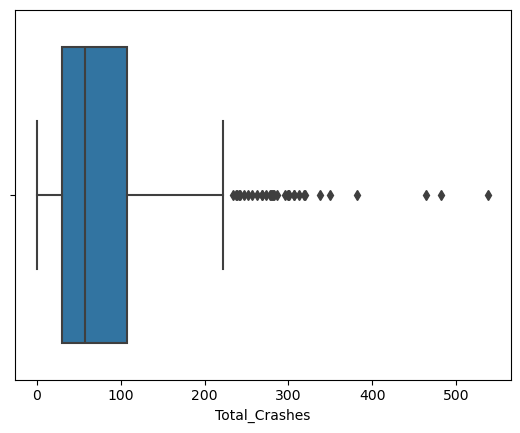

In [45]:
#Interpreting the Total_Crashes columns through a box plot
sns.boxplot(x=data['Total_Crashes'])

In [46]:
#Sorting/resetting the index by value counts of the Total_Crashes column
data['Total_Crashes'].value_counts().sort_index().reset_index()

,Total_Crashes,count
0,1,1
1,3,1
2,5,1
3,6,1
4,7,2
...,...,...
189,349,1
190,382,1
191,464,1
192,482,1


In [47]:
#creating a new variable grouped by state and Total_Crashes with sorted values
df= data.groupby('State')['Total_Crashes'].value_counts().reset_index(name='Counts').sort_values(by=['Total_Crashes'], ascending= False)
df                                                                                                 

,State,Total_Crashes,Counts
168,FCT,538,1
169,FCT,482,1
170,FCT,464,1
171,FCT,382,1
172,FCT,349,1
...,...,...,...
61,Bayelsa,7,2
70,Bayelsa,6,1
71,Bayelsa,5,1
72,Bayelsa,3,1


In [48]:
#Sizing this new variable 
df= data.groupby(['Quarter','State', 'Total_Crashes']).size().reset_index(name='Counts').sort_values(by=['Total_Crashes'], ascending= False)
df                                                   

,Quarter,State,Total_Crashes,Counts
199,Q2 2022,FCT,538,1
458,Q4 2022,FCT,482,1
310,Q3 2022,FCT,464,1
88,Q1 2023,FCT,382,1
347,Q3 2023,FCT,349,1
...,...,...,...,...
5,Q1 2021,Bayelsa,7,1
79,Q1 2023,Bayelsa,6,1
338,Q3 2023,Bayelsa,5,1
486,Q4 2023,Bayelsa,3,1


<Axes: >

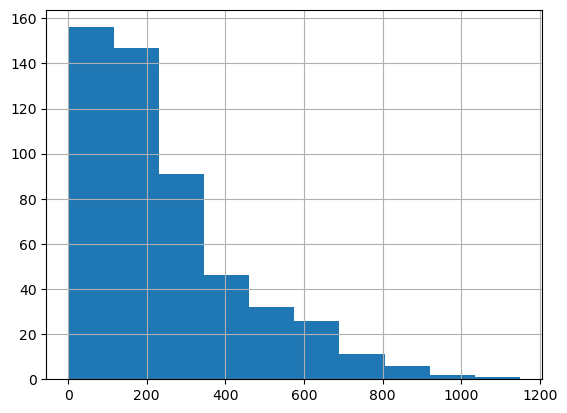

In [49]:
#Interperting the Num_Injured coumn on a histogram
data['Num_Injured'].hist()

In [50]:
#Creating a new variable grouped by Quarter, State and Num_injured column; sized and sorted
df= data.groupby(['Quarter','State', 'Num_Injured']).size().reset_index(name='Counts').sort_values(by=['Num_Injured'], ascending= False)
df                                               

,Quarter,State,Num_Injured,Counts
18,Q1 2021,Kaduna,1149,1
199,Q2 2022,FCT,1028,1
388,Q4 2020,Kaduna,1010,1
499,Q4 2023,Kaduna,889,1
55,Q1 2022,Kaduna,887,1
...,...,...,...,...
335,Q3 2023,Akwa Ibom,14,1
486,Q4 2023,Bayelsa,14,1
79,Q1 2023,Bayelsa,11,1
375,Q4 2020,Bayelsa,3,1


<Axes: xlabel='Num_Injured'>

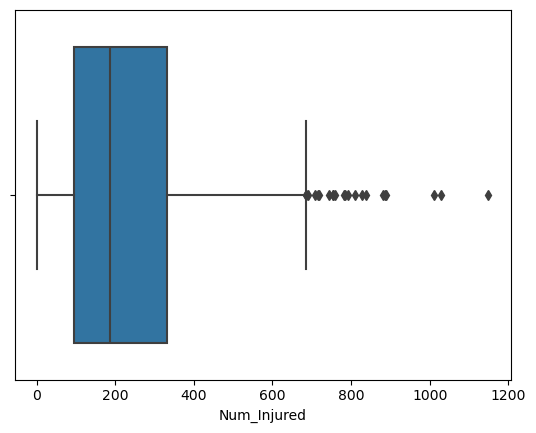

In [51]:
#Interpreting the Num_injured column on a boxplot
sns.boxplot(x=data['Num_Injured'])

# Analysis
# Which Nigerian states experienced the highest number of traffic crashes, and how do these numbers change over time.



In [52]:
#Grouping The data by state and Total_Crashes
Total_Crashes_by_State = data.groupby('State') ['Total_Crashes'].sum().sort_values(ascending=False)
Total_Crashes_by_State

State
FCT            4852
Ogun           3780
Nasarawa       2946
Kaduna         2784
Oyo            2084
Lagos          1939
Niger          1908
Bauchi         1661
Kogi           1651
Ondo           1526
Jigawa         1470
Osun           1310
Kwara          1244
Kano           1097
Gombe          1092
Plateau         998
Benue           879
Adamawa         829
Edo             822
Taraba          790
Enugu           759
Delta           670
Anambra         634
Kebbi           620
Yobe            597
Ebonyi          502
Katsina         497
Cross River     410
Sokoto          396
Ekiti           389
Zamfara         379
Borno           366
Imo             349
Abia            339
Rivers          312
Akwa Ibom       240
Bayelsa         141
Name: Total_Crashes, dtype: int64

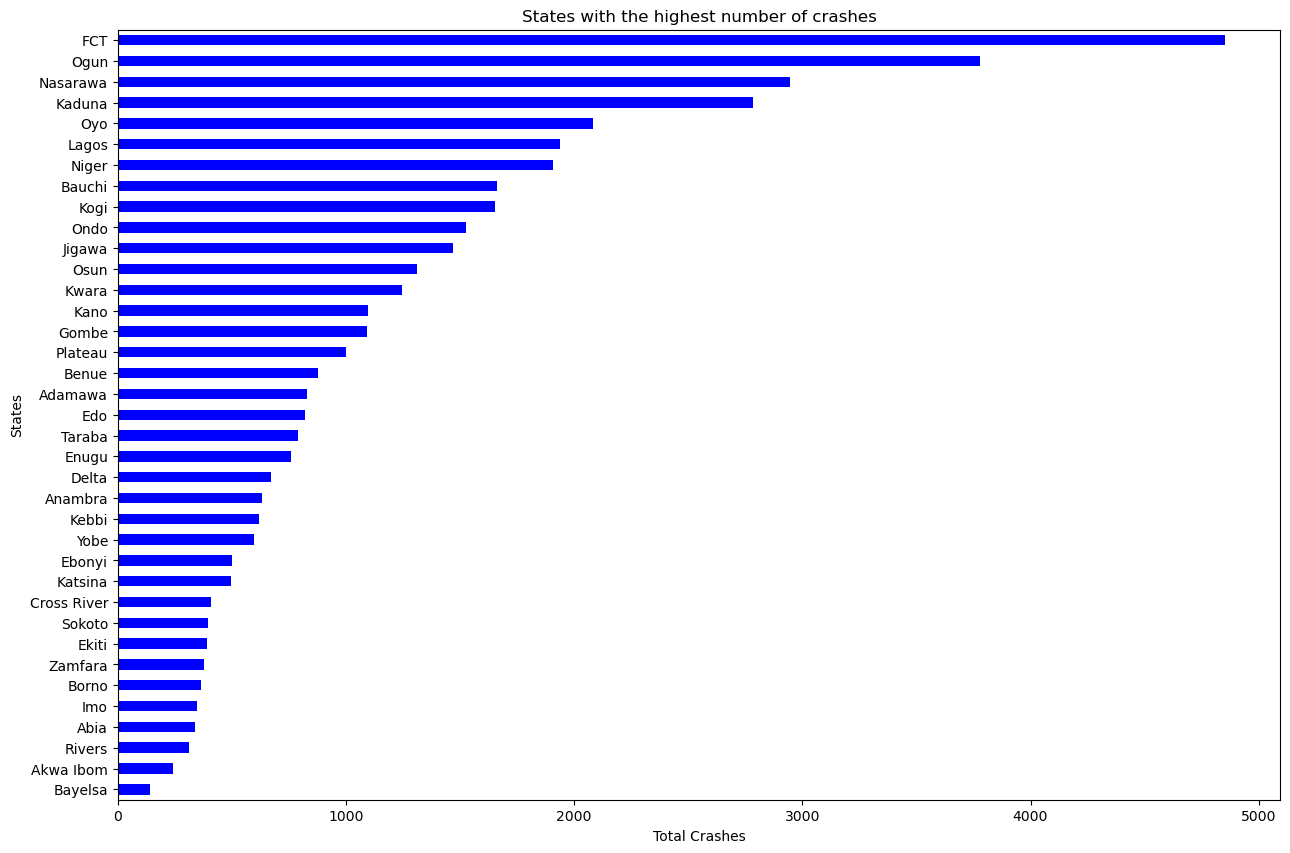

In [53]:
#Polotting a barh of Total_Crashes_by_State

Total_Crashes_by_State = data.groupby('State') ['Total_Crashes'].sum().sort_values(ascending=False)

plt.figure(figsize= (15, 10))
Total_Crashes_by_State.plot(kind='barh', color='blue')
plt.title('States with the highest number of crashes')
plt.ylabel('States')
plt.xlabel('Total Crashes')
plt.gca().invert_yaxis()
plt.yticks(rotation=0)
plt.show()

### LOOKING AT THE CHANGE IN NUMBERS OVER TIME FROM Q4 2020 TO Q1 2024

In [77]:
data.columns

Index(['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed',
       'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'],
      dtype='object')

In [78]:
data.head()

,Quarter,State,Total_Crashes,Num_Injured,Num_Killed,Total_Vehicles_Involved,SPV,DAD,PWR,FTQ,Other_Factors
0,Q4 2020,Abia,30,146,31,37,19,0,0,0,18
1,Q4 2020,Adamawa,77,234,36,94,57,0,0,0,37
2,Q4 2020,Akwa Ibom,22,28,7,24,15,0,0,1,8
3,Q4 2020,Anambra,72,152,20,83,43,1,0,0,39
4,Q4 2020,Bauchi,154,685,90,140,74,0,0,0,66


In [54]:
# Changes of number of crashes over time
Changes_over_time = data.groupby('Quarter')['Total_Crashes'].sum()
Changes_over_time

Quarter
Q1 2021    3301
Q1 2022    3345
Q1 2023    2733
Q1 2024    2662
Q2 2021    3185
Q2 2022    3282
Q2 2023    2967
Q3 2021    3134
Q3 2022    3412
Q3 2023    2187
Q4 2020    3313
Q4 2021    3407
Q4 2022    3617
Q4 2023    2717
Name: Total_Crashes, dtype: int64

In [55]:
Changes_over_time = data.groupby('Quarter')['Total_Crashes'].sum().sort_index().reset_index()
Changes_over_time

,Quarter,Total_Crashes
0,Q1 2021,3301
1,Q1 2022,3345
2,Q1 2023,2733
3,Q1 2024,2662
4,Q2 2021,3185
5,Q2 2022,3282
6,Q2 2023,2967
7,Q3 2021,3134
8,Q3 2022,3412
9,Q3 2023,2187


In [79]:
Changes_over_time = data.groupby('Quarter')['Total_Crashes'].sum().sort_index().reset_index()
Changes_over_time ['cumulative-sum-crashes'] = Changes_over_time['Total_Crashes'].cumsum()
Changes_over_time

,Quarter,Total_Crashes,cumulative-sum-crashes
0,Q1 2021,3301,3301
1,Q1 2022,3345,6646
2,Q1 2023,2733,9379
3,Q1 2024,2662,12041
4,Q2 2021,3185,15226
5,Q2 2022,3282,18508
6,Q2 2023,2967,21475
7,Q3 2021,3134,24609
8,Q3 2022,3412,28021
9,Q3 2023,2187,30208


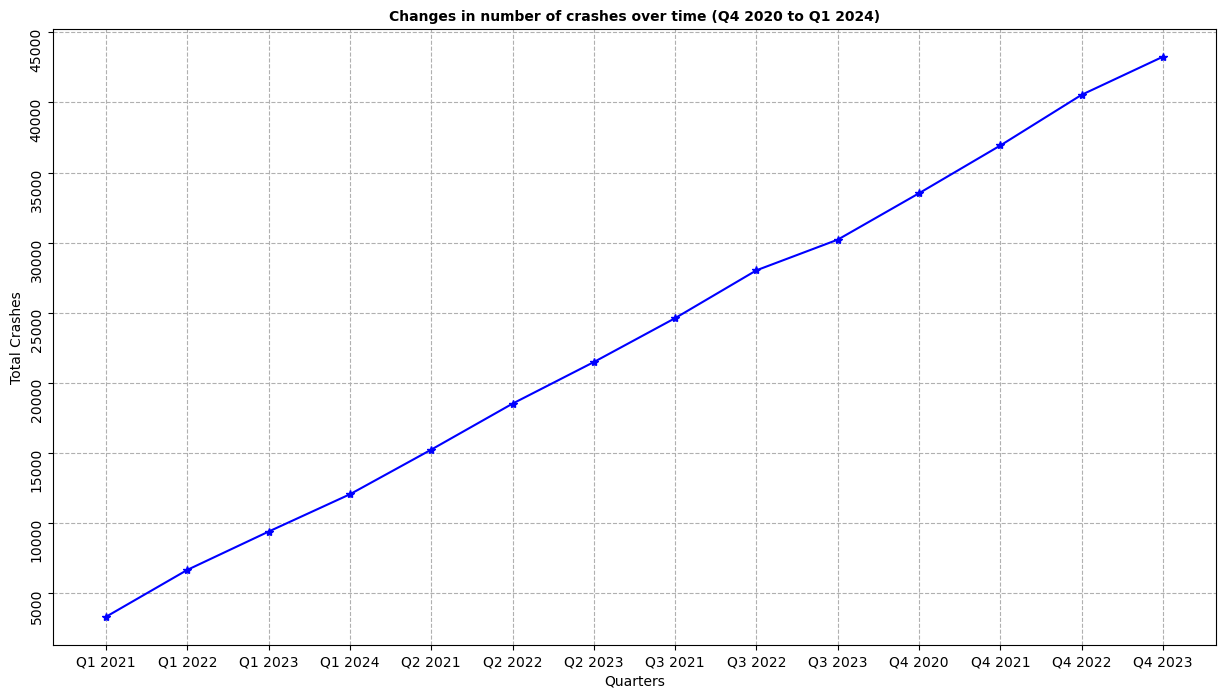

In [57]:
Changes_over_time = data.groupby('Quarter')['Total_Crashes'].sum().sort_index().reset_index()
Changes_over_time ['cumulative-sum-crashes'] = Changes_over_time['Total_Crashes'].cumsum()

plt.figure(figsize= (15, 8))
plt.plot(Changes_over_time['Quarter'], Changes_over_time['cumulative-sum-crashes'], color='blue', marker= '*', label='All States')
plt.title('Changes in number of crashes over time (Q4 2020 to Q1 2024)', fontsize=10, fontweight='bold')
plt.ylabel('Total Crashes')
plt.xlabel('Quarters')
plt.yticks(rotation=90)
plt.grid(linestyle='--', alpha=1)
plt.show()

## What are the major contributing factors (speeding, alcohol/drug influence, poor weather, fatigue, other factors) to road crashes, and how do they impact the severity of accidents (injuries and fatalities).

In [58]:
data.columns

Index(['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed',
       'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'],
      dtype='object')

In [59]:
## Analysis for speed violation by state 

In [60]:
spv_by_state = data.groupby('State')['SPV'].sum().reset_index().sort_values(by= 'SPV', ascending = False)
spv_by_state

,State,SPV
27,Ogun,2455
14,FCT,2101
18,Kaduna,1238
17,Jigawa,1076
25,Nasarawa,1047
26,Niger,1012
30,Oyo,963
28,Ondo,756
22,Kogi,687
24,Lagos,645


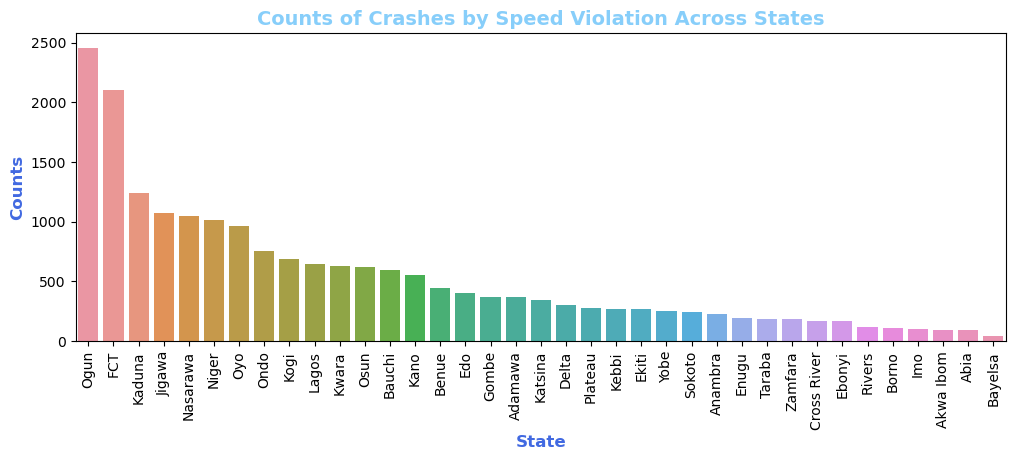

In [61]:
spv_by_state = data.groupby('State')['SPV'].sum().reset_index().sort_values(by= 'SPV', ascending = False)
plt.figure(figsize=(12, 4))
sns.barplot(data=spv_by_state, x='State', y='SPV')
plt.title('Counts of Crashes by Speed Violation Across States', fontsize=14, fontweight='bold', color='#87cefa', loc='center')
plt.xlabel('State', fontsize=12, fontweight='bold', color='#4169e1')
plt.ylabel('Counts', fontsize=12, fontweight='bold', color='#4169e1')
plt.xticks(rotation=90, fontsize=10)
plt.show()

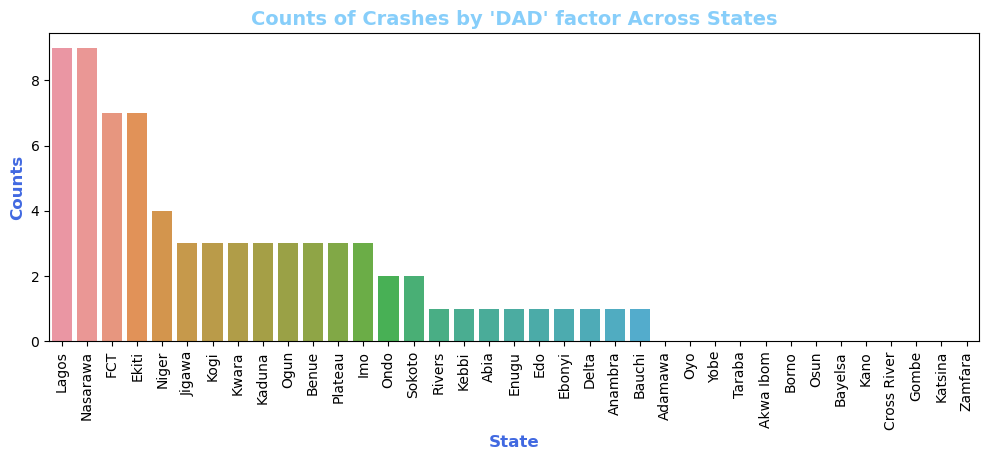

In [62]:
spv_by_state = data.groupby('State')['DAD'].sum().reset_index().sort_values(by= 'DAD', ascending = False)
plt.figure(figsize=(12, 4))
sns.barplot(data=spv_by_state, x='State', y='DAD')
plt.title("Counts of Crashes by 'DAD' factor Across States", fontsize=14, fontweight='bold', color='#87cefa', loc='center')
plt.xlabel('State', fontsize=12, fontweight='bold', color='#4169e1')
plt.ylabel('Counts', fontsize=12, fontweight='bold', color='#4169e1')
plt.xticks(rotation=90, fontsize=10)
plt.show()

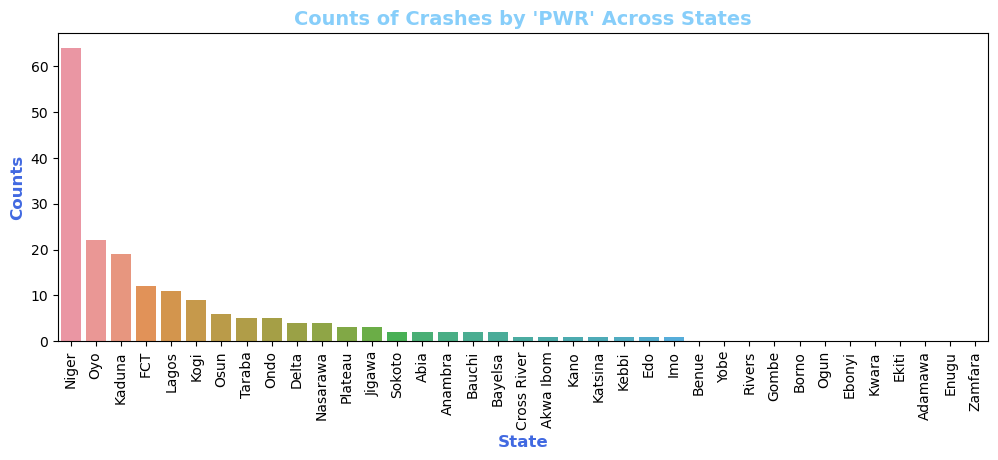

In [63]:
spv_by_state = data.groupby('State')['PWR'].sum().reset_index().sort_values(by= 'PWR', ascending = False)
plt.figure(figsize=(12, 4))
sns.barplot(data=spv_by_state, x='State', y='PWR')
plt.title("Counts of Crashes by 'PWR' Across States", fontsize=14, fontweight='bold', color='#87cefa', loc='center')
plt.xlabel('State', fontsize=12, fontweight='bold', color='#4169e1')
plt.ylabel('Counts', fontsize=12, fontweight='bold', color='#4169e1')
plt.xticks(rotation=90, fontsize=10)
plt.show()

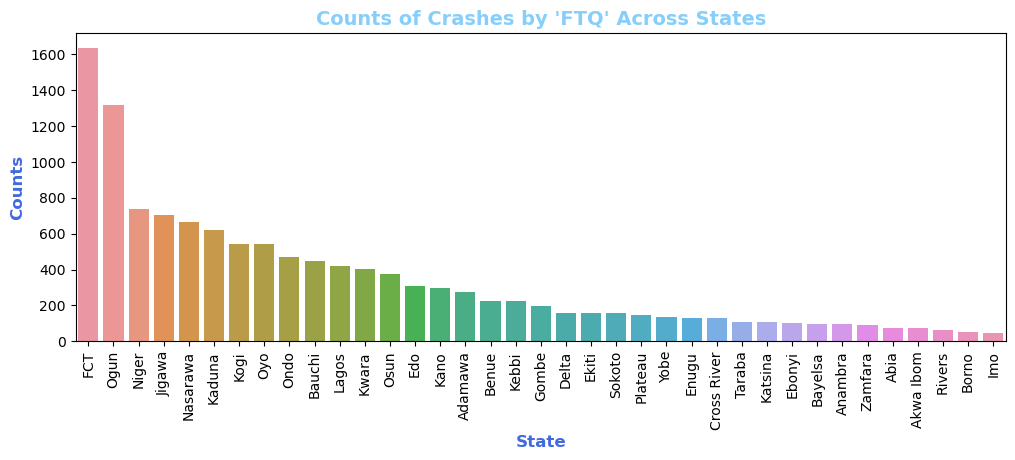

In [64]:
spv_by_state = data.groupby('State')['FTQ'].sum().reset_index().sort_values(by= 'FTQ', ascending = False)
plt.figure(figsize=(12, 4))
sns.barplot(data=spv_by_state, x='State', y='FTQ')
plt.title("Counts of Crashes by 'FTQ' Across States", fontsize=14, fontweight='bold', color='#87cefa', loc='center')
plt.xlabel('State', fontsize=12, fontweight='bold', color='#4169e1')
plt.ylabel('Counts', fontsize=12, fontweight='bold', color='#4169e1')
plt.xticks(rotation=90, fontsize=10)
plt.show()

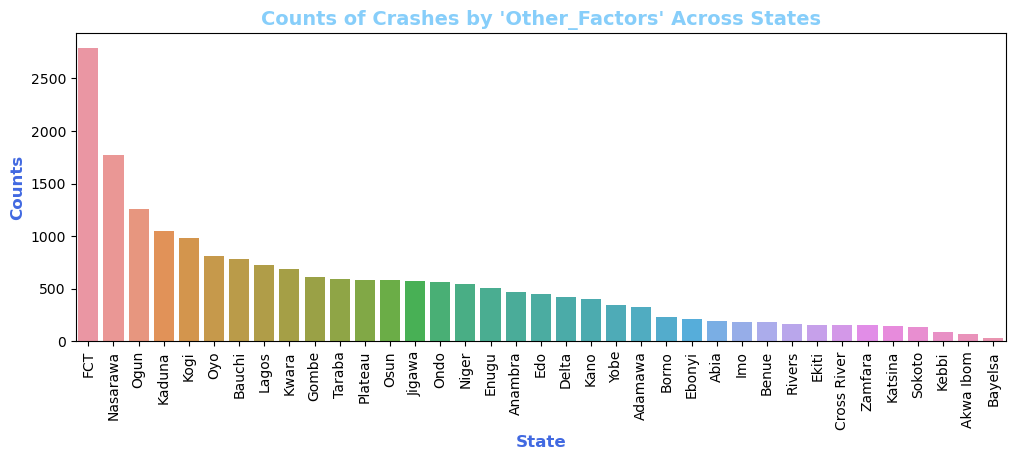

In [65]:
spv_by_state = data.groupby('State')['Other_Factors'].sum().reset_index().sort_values(by= 'Other_Factors', ascending = False)
plt.figure(figsize=(12, 4))
sns.barplot(data=spv_by_state, x='State', y='Other_Factors')
plt.title("Counts of Crashes by 'Other_Factors' Across States", fontsize=14, fontweight='bold', color='#87cefa', loc='center')
plt.xlabel('State', fontsize=12, fontweight='bold', color='#4169e1')
plt.ylabel('Counts', fontsize=12, fontweight='bold', color='#4169e1')
plt.xticks(rotation=90, fontsize=10)
plt.show()

In [66]:
factors = ['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']
fatalities = data[factors].sum()
injuries = data[factors].sum()

sort_factors = (fatalities + injuries)
sort_factors 

SPV              39268
DAD                146
PWR                368
FTQ              24682
Other_Factors    39828
dtype: int64

In [67]:
injuries

SPV              19634
DAD                 73
PWR                184
FTQ              12341
Other_Factors    19914
dtype: int64

In [68]:
fatalities

SPV              19634
DAD                 73
PWR                184
FTQ              12341
Other_Factors    19914
dtype: int64

<BarContainer object of 5 artists>

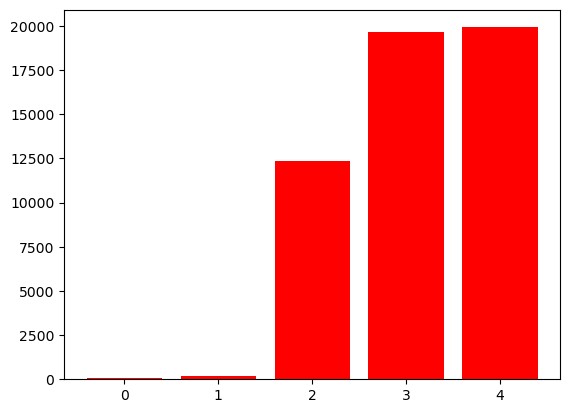

In [69]:
factors = ['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']
fatalities = data[factors].sum()
injuries = data[factors].sum()

sort_factors = (fatalities + injuries).sort_values().index
fatalities = fatalities[sort_factors]
injuries = injuries[sort_factors]

x = range(len(sort_factors))
plt.bar(x, fatalities, label='Fatalities', color = '#ff0000')
plt.bar(x, fatalities, label='Fatalities', color = '#ff0000')

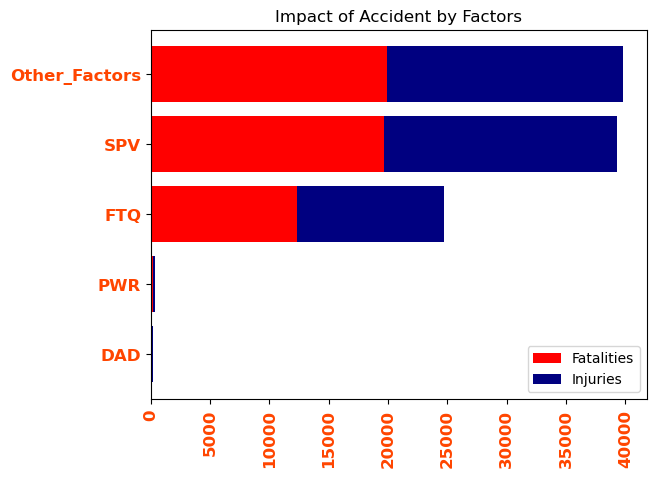

In [70]:
factors = ['SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors']
fatalities = data[factors].sum()
injuries = data[factors].sum()

sort_factors = (fatalities + injuries).sort_values().index
fatalities = fatalities[sort_factors]
injuries = injuries[sort_factors]

x = range(len(sort_factors))
plt.barh(x, fatalities, label='Fatalities', color = '#ff0000')
plt.barh(x, injuries, left=fatalities, label='Injuries', color = '#000080')
plt.title('Impact of Accident by Factors')
plt.yticks(x, sort_factors, fontsize=12, fontweight='bold', color='#ff4500')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='#ff4500')
plt.legend(loc = 'lower right')
plt.show()

In [71]:
#correlation of "Total_Vehicles_INvolved" with "Num_Injured" and "Num_Killed"
corr = data[['Total_Vehicles_Involved', 'Num_Injured',  'Num_Killed']].corr()
corr

,Total_Vehicles_Involved,Num_Injured,Num_Killed
Total_Vehicles_Involved,1.000000,0.775626,0.615409
Num_Injured,0.775626,1.000000,0.869543
Num_Killed,0.615409,0.869543,1.000000


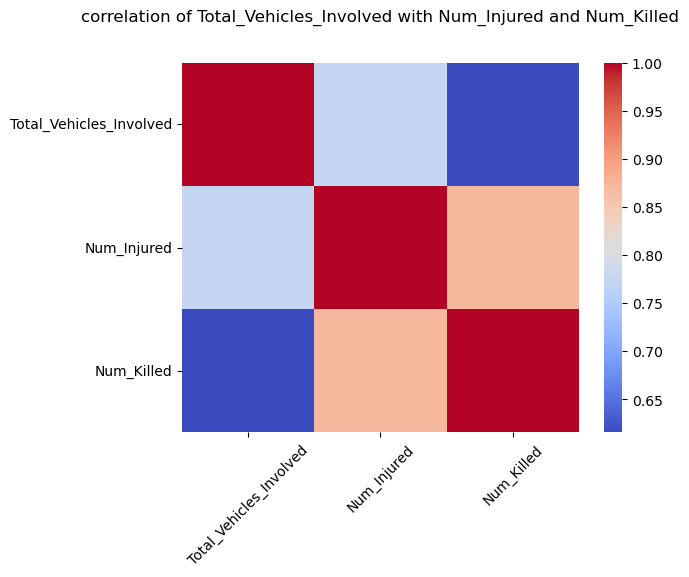

In [72]:
sns.heatmap(corr, cmap='coolwarm')
plt.title('correlation of Total_Vehicles_Involved with Num_Injured and Num_Killed', pad=30, loc='center')
plt.xticks(rotation=45)
plt.show()

## How do the total number of vehicles involved in crashes correlate with the number of injuries and fatalities.

In [73]:
data.columns

Index(['Quarter', 'State', 'Total_Crashes', 'Num_Injured', 'Num_Killed',
       'Total_Vehicles_Involved', 'SPV', 'DAD', 'PWR', 'FTQ', 'Other_Factors'],
      dtype='object')

In [74]:
#correlation of Total vehicles involved with'Num_injured and Num_Killed
corr = data[[ 'Total_Vehicles_Involved', 'Num_Injured', 'Num_Killed' ]].corr()
corr

,Total_Vehicles_Involved,Num_Injured,Num_Killed
Total_Vehicles_Involved,1.000000,0.775626,0.615409
Num_Injured,0.775626,1.000000,0.869543
Num_Killed,0.615409,0.869543,1.000000


## write a report on all the analysis with key visualisations cited 

From the Analysis of the Nigerian Traffic Crashes from Q4 2020 to Q1 2024 we made the following observations 
1. That FCT had the most car crashes and it fell in Q2 2022
2. that Kaduna had the highest number of injuries (Q1 2021) and fatalities(Q4 2020)
3. Using a graph, we discovered that Q4 2023 had the highest number of cummulative crashes followed by Q4 2022
4. We also discovered using a barh chart that Other_factors had the most impact on car crashes, followed by speed driving where Ogun was the leading state in crashes. Fatigue is another major factor with FCT being the lead state with the highest number of crashes; poor weather and Driving under alcohol have their numbers as well but is not compared to the 3 major factors.
5. Our analysis shows that FCT is a state majorly affected by crashes with FCT being the lead state in other factors and FTQ and also giving major numbers in other causatives of road traffic crashes.

6. Through our Heat mat we were able to find out the correlation of Total_Crashes with Num Injured and Num_Killed. this shows that not every road accident leads to a direct  fatality. there is a  strong correlation in each factor individually but a weaker correlation between factors. this means that a traffic crash can cause injuries and victims later die of injury severity; also there is a chance of survival from thr injuries.